In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from torch_dreams.dreamer import dreamer
import torchvision.models as models
import torch

In [2]:
model = models.inception_v3(pretrained=True)
dreamy_boi = dreamer(model)

dreamer init on:  cuda


In [3]:
layers_to_use = [model.Mixed_5d]

In [4]:
def custom_func(layer_outputs):
    losses = []

    output_channel = layer_outputs[0][6]
    loss_component = torch.nn.MSELoss(reduction='mean')(output_channel, torch.zeros_like(output_channel))
    losses.append(loss_component)


    loss = torch.mean(torch.stack(losses))
    return loss

In [5]:
out_single_conv = dreamy_boi.deep_dream(
    image_path = "images/noise.jpg",
    layers = layers_to_use,
    octave_scale = 1.2,
    num_octaves = 10,
    iterations = 30,
    lr = 0.01,
    custom_func =  None,
    max_rotation =  0.3,
    gradient_smoothing_coeff= 1.5,
    gradient_smoothing_kernel_size= 9,
    
)

100%|██████████| 11/11 [00:07<00:00,  1.38it/s]


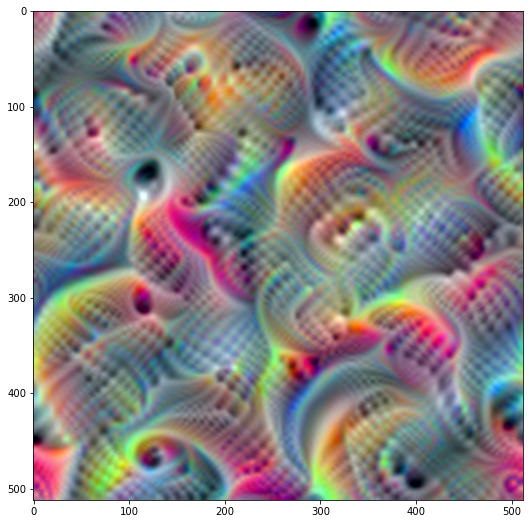

In [6]:
## s
plt.rcParams["figure.figsize"] = (9,9)
plt.imshow(out_single_conv)
plt.show()

In [8]:
out_single_conv_ruff = dreamy_boi.deep_dream(
    image_path = "images/noise.jpg",
    layers = layers_to_use,
    octave_scale = 1.2,
    num_octaves = 9,
    iterations = 20,
    lr = 0.03,
    custom_func =  None,
    max_rotation =  0.3,
    gradient_smoothing_coeff= None,
    gradient_smoothing_kernel_size= None
    
)

100%|██████████| 10/10 [00:04<00:00,  2.15it/s]


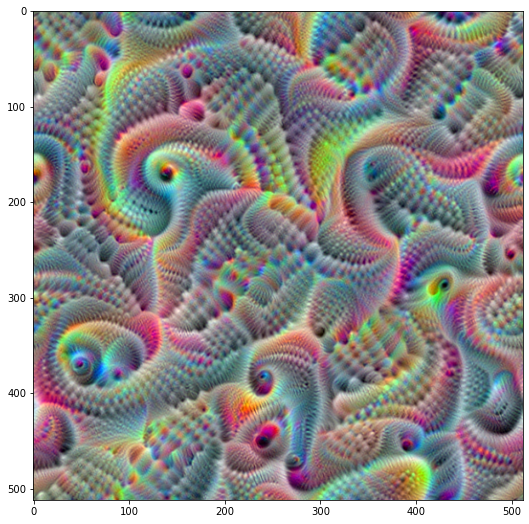

In [9]:
## s
plt.rcParams["figure.figsize"] = (9,9)
plt.imshow(out_single_conv_ruff)
plt.show()

In [10]:
old = cv2.imread('old.jpg')
old_same_hyperparams = cv2.imread('old_same.jpg')

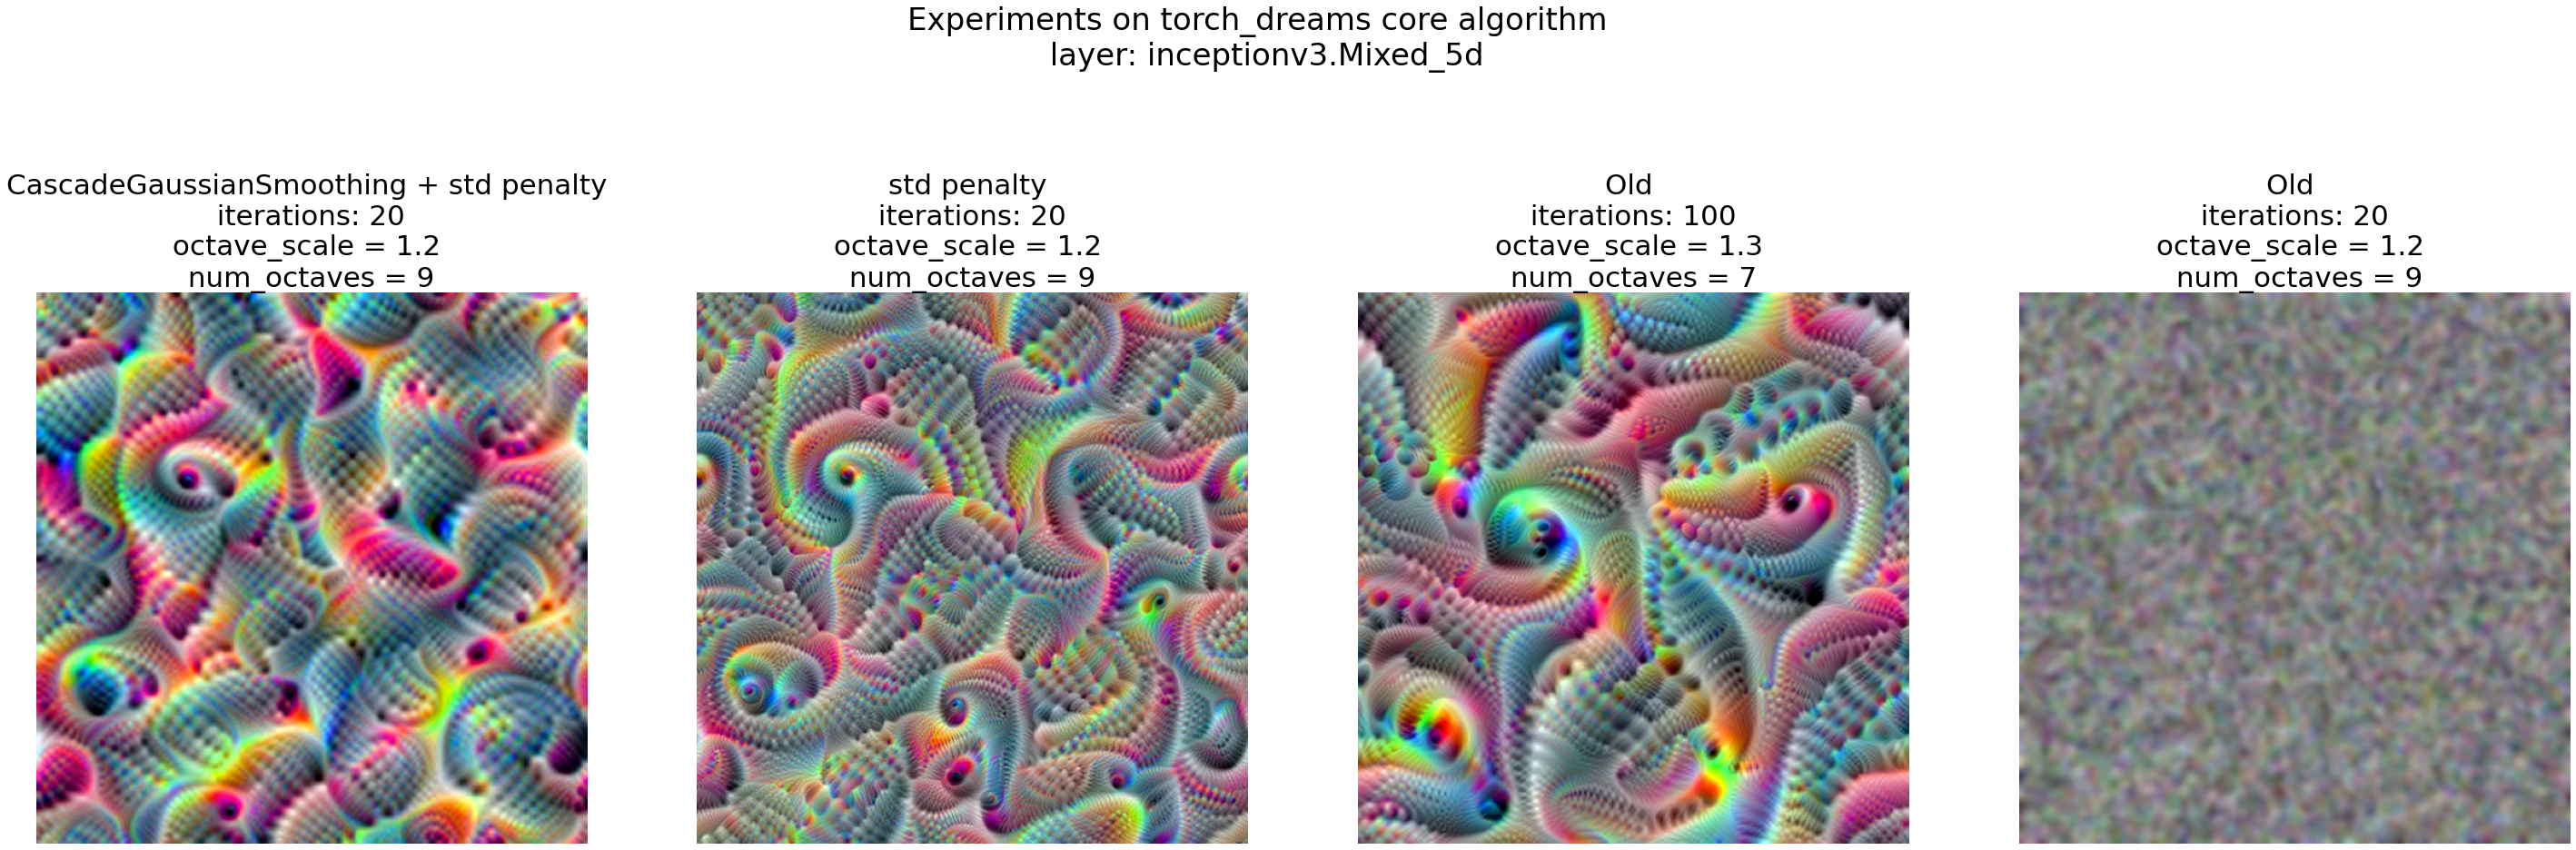

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize = (50,18))

ax.flat[0].imshow(out_single_conv)
ax.flat[0].axis("off")

ax.flat[1].imshow(out_single_conv_ruff)
ax.flat[1].axis("off")

ax.flat[2].imshow(old)
ax.flat[2].axis("off")


ax.flat[3].imshow(old_same_hyperparams)
ax.flat[3].axis("off")

ax.flat[0].set_title("CascadeGaussianSmoothing + std penalty \n iterations: 20 \n octave_scale = 1.2  \n num_octaves = 9 ", fontsize = 31)
ax.flat[1].set_title("std penalty \n iterations: 20 \n octave_scale = 1.2  \n num_octaves = 9 ", fontsize = 31)

ax.flat[2].set_title("Old \n iterations: 100 \n octave_scale = 1.3  \n num_octaves = 7 ", fontsize = 31)
ax.flat[3].set_title("Old \n iterations: 20 \n octave_scale = 1.2  \n num_octaves = 9", fontsize = 31)

fig.suptitle('Experiments on torch_dreams core algorithm \n layer: inceptionv3.Mixed_5d', fontsize=34)


fig.savefig("experiment_grad_smoothing.jpg")

In [68]:
coeffs = np.linspace(0.1, 5.0, 20)

all_smooth = []
for coeff in coeffs:
    out_single_conv = dreamy_boi.deep_dream(
    image_path = "images/noise.jpg",
    layers = layers_to_use,
    octave_scale = 1.2,
    num_octaves = 9,
    iterations = 20,
    lr = 0.03,
    custom_func =  None,
    max_rotation =  0.3,
    gradient_smoothing_coeff= coeff,
    gradient_smoothing_kernel_size= 9
    
    )
    all_smooth.append(out_single_conv)

100%|██████████| 10/10 [00:05<00:00,  1.81it/s]


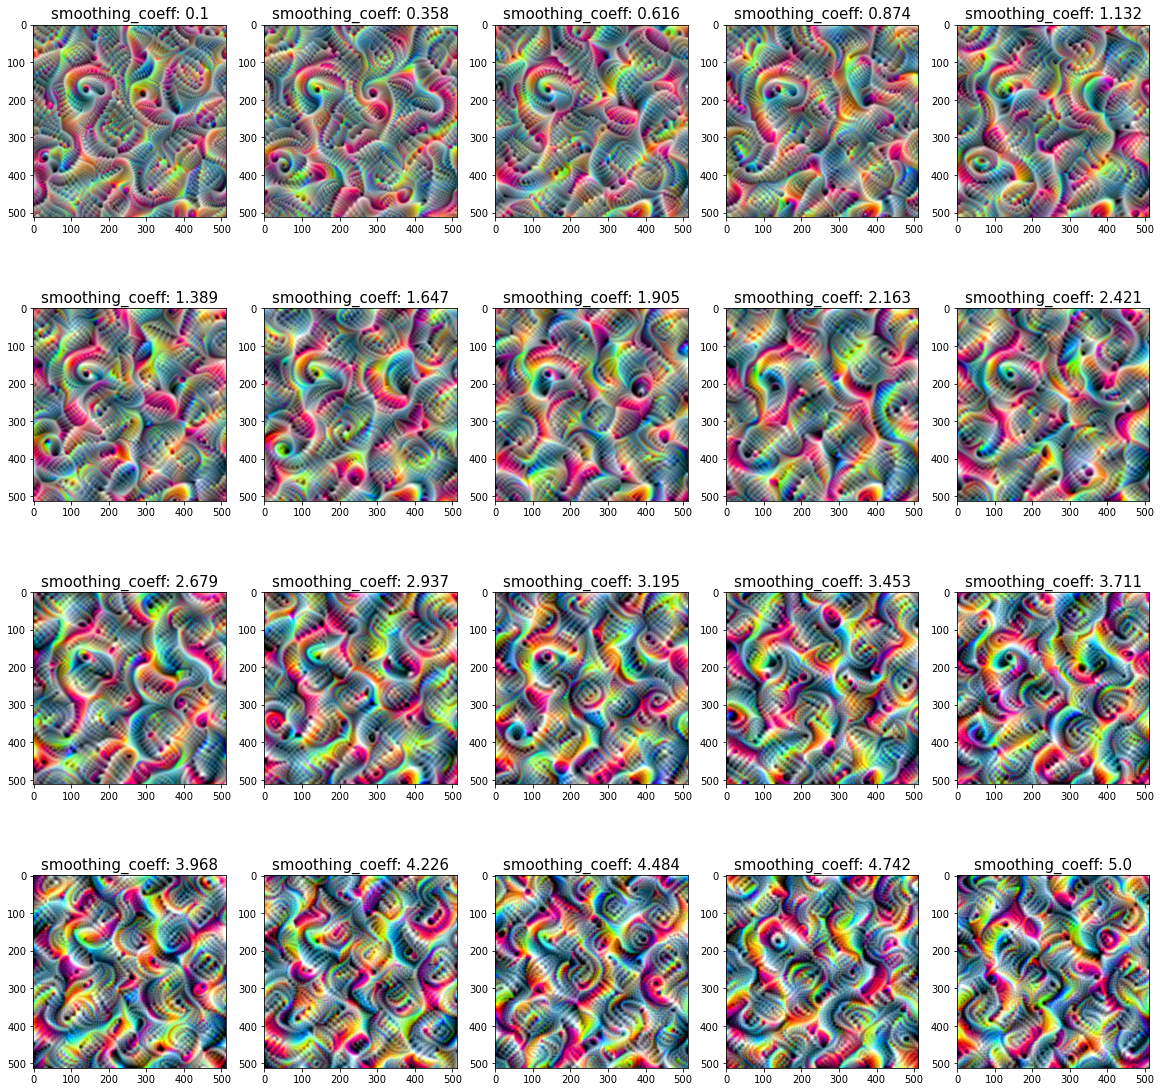

In [79]:
fig, ax = plt.subplots(nrows=4, ncols=5, figsize = (20,20))

for i in range(len(all_smooth)):
    ax.flat[i].imshow(all_smooth[i])
    ax.flat[i].set_title("smoothing_coeff: " + str(round(coeffs[i],3)), fontsize = 15)

fig.savefig("experiment_grad_smoothing_coeff.jpg")

100%|██████████| 10/10 [00:05<00:00,  1.71it/s]


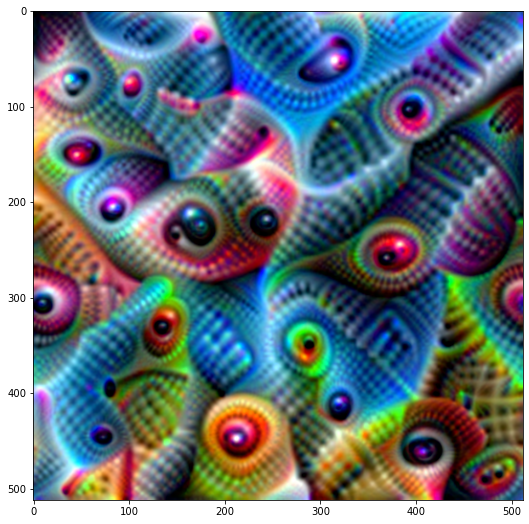

In [91]:
layers_to_use = [model.Mixed_6a]

out_single_conv = dreamy_boi.deep_dream(
    image_path = "images/sample_small.jpg",
    layers = layers_to_use,
    octave_scale = 1.2,
    num_octaves = 9,
    iterations = 20,
    lr = 0.03,
    custom_func =  None,
    max_rotation =  0.3,
    gradient_smoothing_coeff= 1.5,
    gradient_smoothing_kernel_size= 9
    
)
plt.rcParams["figure.figsize"] = (9,9)
plt.imshow(out_single_conv)
plt.show()

100%|██████████| 11/11 [00:05<00:00,  1.89it/s]


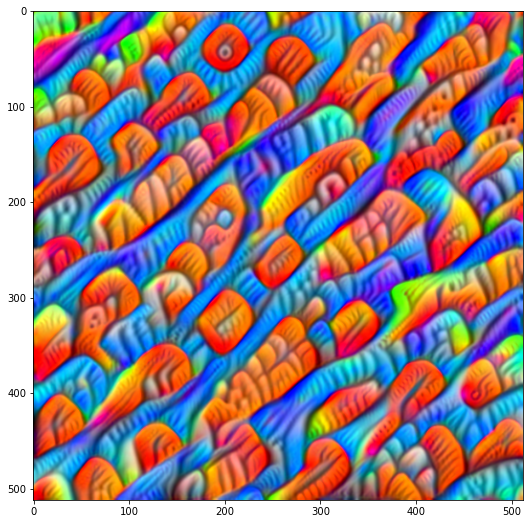

In [115]:
layers_to_use = [model.Mixed_5b]

out_single_conv = dreamy_boi.deep_dream(
    image_path = "images/noise.jpg",
    layers = layers_to_use,
    octave_scale = 1.2,
    num_octaves = 10,
    iterations = 20,
    lr = 0.03,
    custom_func =  None,
    max_rotation =  0.3,
    gradient_smoothing_coeff= 1.5,
    gradient_smoothing_kernel_size= 9
    
)
plt.rcParams["figure.figsize"] = (9,9)
plt.imshow(out_single_conv)
plt.show()